In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

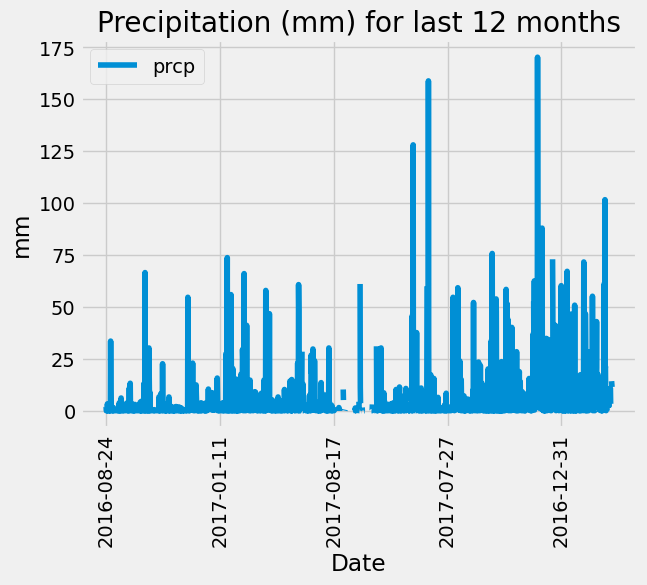

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
conn = engine.connect()

# Calculate the date one year from the last date in data set.
date_prcp_data = pd.read_sql("SELECT date, prcp FROM measurement", conn)

# Perform a query to retrieve the data and precipitation scores
date_prcp_data_12months=date_prcp_data[date_prcp_data['date']> '2016-08-23']

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_data_12months_dateindex=date_prcp_data_12months.set_index('date')

# Sort the dataframe by date
date_prcp_data_12months_dateindex.sort_index(ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data
fig=date_prcp_data_12months_dateindex.plot(title='Precipitation (mm) for last 12 months', y='prcp', use_index=True, rot=90)
fig.set_xlabel("Date")
fig.set_ylabel("mm")
plt.savefig("./Precipitation last 12 months.png")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prcp_data_12months_dateindex.describe()

,prcp
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_count=session.query(Measurement.station).distinct().count()
print(f'Number of station is {total_count}.')

Number of station is 9.


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.date)).\
    order_by(func.count(Measurement.date).desc()).\
    group_by(Measurement.station).all()            

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
explore_station_df = pd.read_sql("SELECT station, date, tobs FROM measurement", conn)
station_activity=explore_station_df.groupby('station').count()

print('Station and the counts in descending order: ')
station_activity['date'].sort_values(ascending=False)

Station and the counts in descending order: 


station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: date, dtype: int64

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')
print(f'Lowest temperature is {min_temp[0][0]}')


max_temp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')
print(f'Highest temperature is {max_temp[0][0]}')

avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281')
print(f'Average temperature is {round(avg_temp[0][0],1)}')

Lowest temperature is 12.2
Highest temperature is 29.4
Average temperature is 22.0


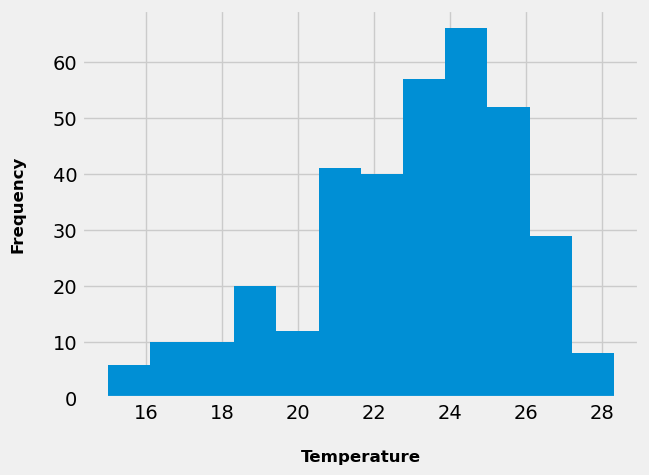

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs_temp_df = pd.read_sql("SELECT station, date, tobs FROM measurement", conn)
obs_temp_12month_df=obs_temp_df[obs_temp_df['date']> '2016-08-23']
obs_temp_12month_active_station_df=obs_temp_12month_df[obs_temp_12month_df['station']=='USC00519281']
obs_temp_12month_active_station_df.set_index('station',inplace=True)

fig2=obs_temp_12month_active_station_df.hist(column='tobs',bins=12)

fig2=fig2[0]

for x in fig2:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Temperature", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

plt.savefig("./Tobs.png")
plt.show()

# Close Session

In [18]:
# Close Session
session.close()